# Topic - World Happiness Report 2019

Mudit Chugh

## DataSet Description

Dataset name: World Happiness Report 2019<br>
Source: Kaggle<br>
Dataset link:- https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019<br>


The data has been released by SDSN and extracted by PromptCloud's custom web crawling solution

## Attribute Information:

DataSet contains nine attributes :- 'Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'.

## Project contains:

1. Exploratory data analysis<br>
2. Comparison of India With Different Countries

### Step1 - Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import cufflinks as cf
import plotly as py
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 
cf.go_offline()

### Step2 - Data Preperation

In [3]:
df = pd.read_csv('happiness 2019.csv')

In [4]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [5]:
df.shape

(156, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [7]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [8]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

### Step3 - Exploratory data analysis

#### Earth Map showing rank of different countries according to World Happiness Report 2019

In [9]:
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        reversescale = True,
        locations = df['Country or region'],
        locationmode = "country names",
        z = df['Overall rank'],
        colorbar = {'title' : 'World Happiness Rank 2019'},
        
      ) 

layout = dict(width = 900, height=500,title = 'World Happiness Rank 2019',
                geo = dict(showframe = False,projection={'type':'equirectangular'})
             )

In [10]:
choromap = go.Figure(data = [data],layout = layout,)
iplot(choromap,validate=False)

#### Earth Globe showing Happiness Score of different Countries

In [11]:
import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(type = 'choropleth', 
           locations = df['Country or region'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = df['Score'], 
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

#### Showing Correlation between different attributes

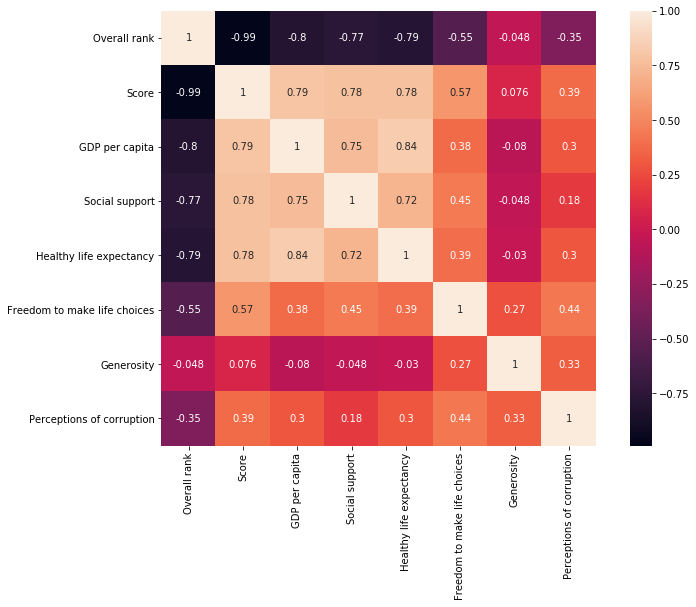

In [12]:
    corrmat = df.corr()
    f,ax = plt.subplots(figsize=(12,8))
    sns.heatmap(corrmat, square=True,annot=True)

#### GDP Of Top 10 Countries

In [13]:
data=df.nlargest(10,'GDP per capita')
data.iplot(kind='bar',x='Country or region',y='GDP per capita')

#### Top 25 Countries having highest Freedom to make life choices

In [14]:
data=df.nlargest(25,'Freedom to make life choices')
data.iplot(kind='bar',x='Country or region',y='Freedom to make life choices',color='green')

#### Some attractive and informative statistical graphs

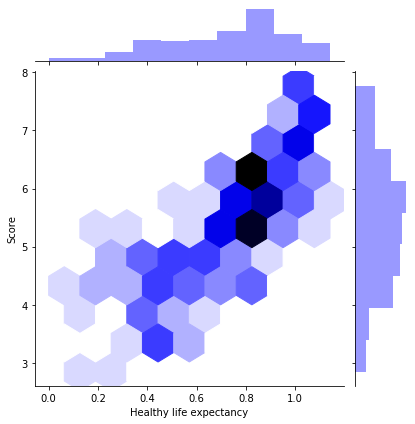

In [15]:
sns.jointplot(x='Healthy life expectancy',y='Score',data=df,kind='hex',color='blue')

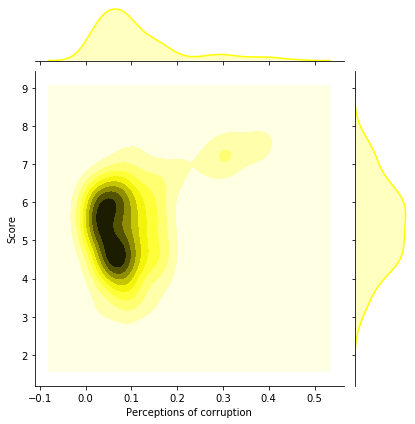

In [16]:
sns.jointplot(x='Perceptions of corruption', y='Score',data=df ,kind="kde",color='yellow')

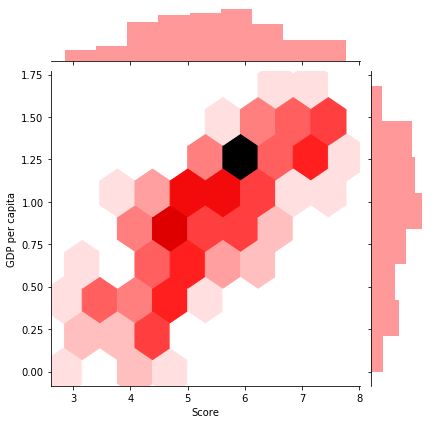

In [17]:
sns.jointplot(x="Score",y="GDP per capita",data=df,kind="hex",color= 'red')


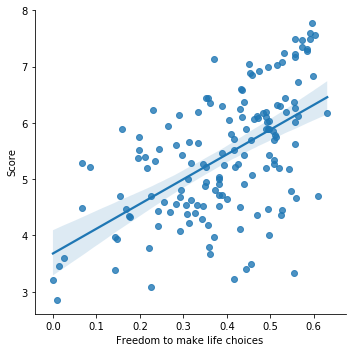

In [18]:
sns.lmplot(x="Freedom to make life choices" ,y= "Score", data=df)


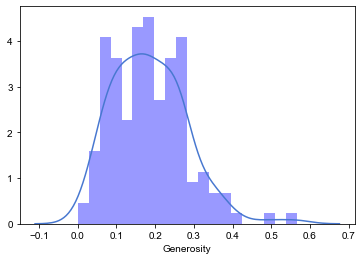

In [19]:
sns.distplot(df['Generosity'], bins=20, kde=True, color='b')
sns.set(style='dark',palette='muted',font_scale=1)

#### Top 10 Countries having Highest Corruption

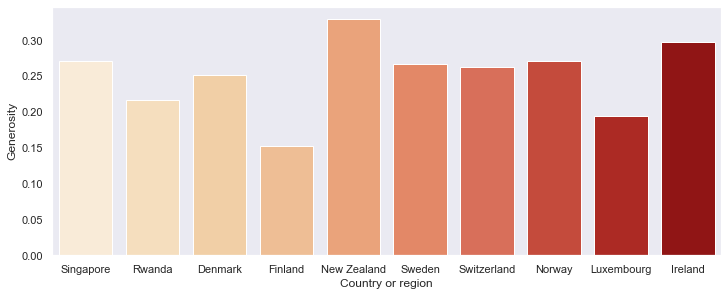

In [20]:
fig, axes = plt.subplots(constrained_layout=True,figsize=(10,4))
sns.barplot(x='Country or region' ,y='Generosity',data=df.nlargest(10,'Perceptions of corruption'),
            ax=axes,palette='OrRd')

#### Comparison between Social Support and Healthy life expectancy

In [21]:
df1= df[(df['Country or region'].isin(['India','Finland','United Kingdom', 'United States','Norway']))]
df1

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
14,15,United Kingdom,7.054,1.333,1.538,0.996,0.450,0.348,0.278
18,19,United States,6.892,1.433,1.457,0.874,0.454,0.280,0.128
139,140,India,4.015,0.755,0.765,0.588,0.498,0.200,0.085


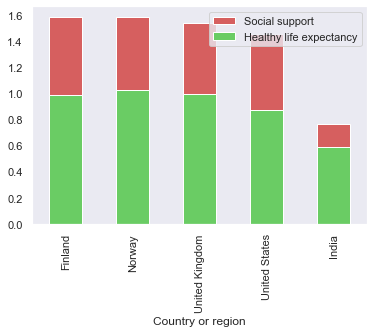

In [22]:
ax = df1.plot(y="Social support", x="Country or region", kind="bar",color='C3')

df1.plot(y="Healthy life expectancy", x="Country or region", kind="bar", ax=ax, color="C2")

plt.show()

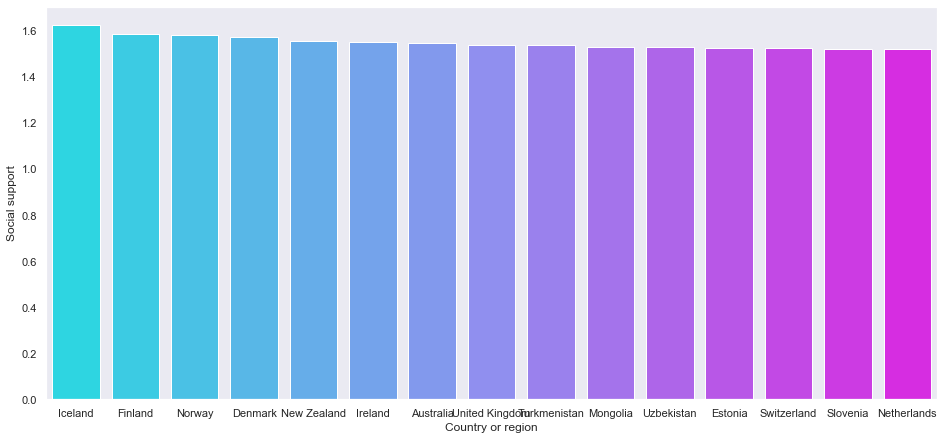

In [23]:
fig, axes = plt.subplots(constrained_layout=True,figsize=(13,6))
sns.barplot(x='Country or region' ,y='Social support',data=df.nlargest(15,'Social support'),
            ax=axes,palette='cool')


#### Comparison between Generosity and Perceptions of Corruption

In [24]:
df[['Generosity','Perceptions of corruption']].iplot(kind='spread')

C:\ProgramData\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\ProgramData\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



## Comparison of India With Different Countries

In [25]:
df.loc[df['Country or region']=='India']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
139,140,India,4.015,0.755,0.765,0.588,0.498,0.2,0.085


In [26]:
d= df[(df['Country or region'].isin(['India','China','United Kingdom', 'United States','Finland']))]

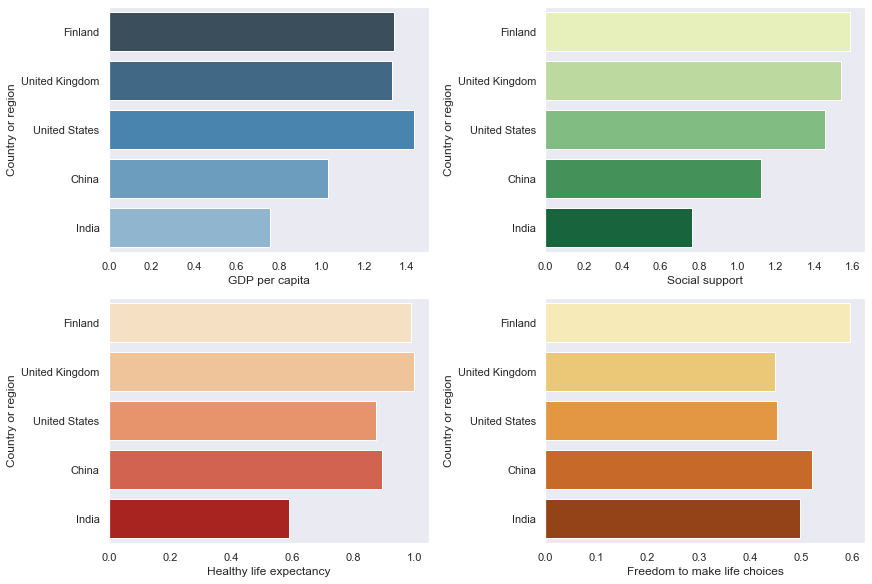

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='GDP per capita',y='Country or region',data=d,ax=axes[0,0],palette="Blues_d")

sns.barplot(x='Social support' ,y='Country or region',data=d,ax=axes[0,1],palette="YlGn")

sns.barplot(x='Healthy life expectancy' ,y='Country or region',data=d,ax=axes[1,0],palette='OrRd')

sns.barplot(x='Freedom to make life choices' ,y='Country or region',data=d,ax=axes[1,1],palette='YlOrBr')

### Thank You

#### Mudit Chugh